In [2]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [5]:
print(X)

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                    1         

In [6]:
print(y)

     Class
0        2
1        2
2        2
3        2
4        2
..     ...
694      2
695      2
696      4
697      4
698      4

[699 rows x 1 columns]


In [7]:
X.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses'],
      dtype='object')

Aşşağıdaki kod satırı ile eksik değer tespiti yapılmıştır ve sonuç 16 olarak bulunmuştur

In [8]:
X.isna().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [9]:
y.isna().sum()

Class    0
dtype: int64

Aşşağıda yer alan kod parçasında genel tüm değişkenler arası bir korelasyon hesaplanmıştır ve korelasyon matrisi oluşturularak aralarındaki ilişkilere bakılmıştır.

Sonuç olarak; en güçlü ve pozitif ilişkili değişkenler Uniformity_of_cell_size ile Uniformity_of_cell_shape olduğu görülmektedir.

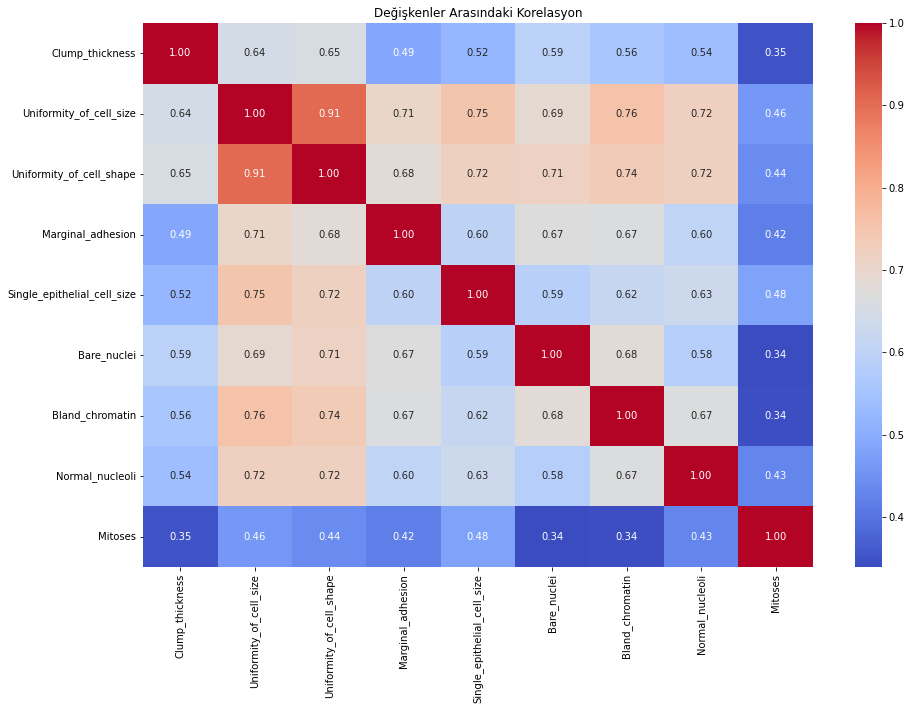

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
correlation_matrix = X.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arasındaki Korelasyon')
plt.show()

In [11]:
eksik_degerler=X.groupby(["Uniformity_of_cell_size","Uniformity_of_cell_shape"])["Bare_nuclei"].transform("mean").round(0)
X["Bare_nuclei"].fillna(eksik_degerler, inplace= True)

C:\Users\Pelin\AppData\Local\Temp\ipykernel_3396\975636595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Bare_nuclei"].fillna(eksik_degerler, inplace= True)


In [12]:
X.isna().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

In [13]:
X.duplicated().sum()

242

In [15]:
print(X.dtypes)


Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
dtype: object


In [16]:
X.shape

(699, 9)

In [17]:
y.shape

(699, 1)

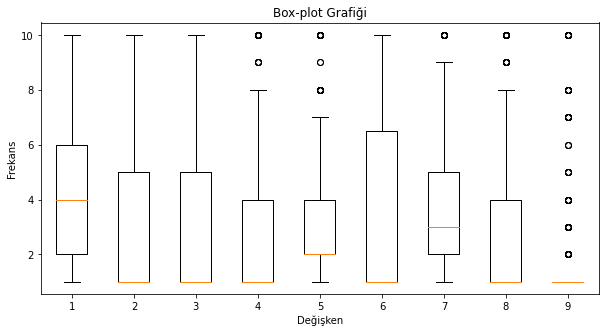

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

figure = plt.figure(figsize=(10,5))

plt.boxplot(X)
plt.title('Box-plot Grafiği')
plt.xlabel('Değişken')
plt.ylabel('Frekans')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# X, bağımsız değişkenlerinizi ve y, bağımlı değişkeninizi tanımlayın

# Örnek olarak:
# X = veri[['Clump_thickness', 'Uniformity_of_cell_size', ...]]
# y = veri['Target']

# Train ve test setlerini oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y.replace({2: 0, 4: 1}, inplace=True)


C:\Users\Pelin\AppData\Local\Temp\ipykernel_3396\808150207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({2: 0, 4: 1}, inplace=True)


In [21]:
print(y)

     Class
0        0
1        0
2        0
3        0
4        0
..     ...
694      0
695      0
696      1
697      1
698      1

[699 rows x 1 columns]


In [22]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test seti doğruluk oranı:", accuracy)


Test seti doğruluk oranı: 0.9642857142857143


In [24]:
from sklearn.model_selection import cross_val_score

model = XGBClassifier()


cv_scores = cross_val_score(model, X, y, cv=5)


print("Cross-validation Scores:", cv_scores)

mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)


Cross-validation Scores: [0.9        0.92142857 0.96428571 0.98571429 0.97841727]
Mean Accuracy: 0.9499691675231243


yukarıda cross-validation ile modelimizin doğruluk oranına bakılarak overfitting yapıp yapmadığı ile ilgili inceleme yapılmıştır

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb)

precision_xgb = precision_score(y_test, y_pred)
print("Precision:", precision_xgb)


recall_xgb = recall_score(y_test, y_pred)
print("Recall:", recall_xgb)

roc_auc_xgb = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_xgb)


Accuracy: 0.9642857142857143
Precision: 0.9545454545454546
Recall: 0.9333333333333333
ROC AUC Score: 0.956140350877193


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr)


precision_lr = precision_score(y_test, y_pred)
print("Precision:", precision_lr)

recall_lr = recall_score(y_test, y_pred)
print("Recall:", recall_lr)


roc_auc_lr = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_lr)



Accuracy: 0.9428571428571428
Precision: 0.9743589743589743
Recall: 0.8444444444444444
ROC AUC Score: 0.9169590643274854


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()


cv_scores = cross_val_score(model, X, y, cv=5)


print("Cross-validation Scores:", cv_scores)

mean_accuracy_lr = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy_lr)

Cross-validation Scores: [0.92857143 0.93571429 0.97857143 0.98571429 0.98561151]
Mean Accuracy: 0.9628365878725591


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation Scores:", cv_scores)


mean_accuracy_rf = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy_rf)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

precision_rf = precision_score(y_test, y_pred)
print("Precision:", precision_rf)


recall_rf = recall_score(y_test, y_pred)
print("Recall:", recall_rf)


roc_auc_rf = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_rf)

C:\Users\Pelin\AppData\Local\Temp\ipykernel_3396\2009068890.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Cross-validation Scores: [0.92142857 0.93571429 0.98571429 0.97142857 0.98561151]
Mean Accuracy: 0.9599794450154162
Accuracy: 0.9714285714285714
Precision: 0.9555555555555556
Recall: 0.9555555555555556
ROC AUC Score: 0.9672514619883043


In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)

precision_svm = precision_score(y_test, y_pred)
print("Precision:", precision_svm)


recall_svm = recall_score(y_test, y_pred)
print("Recall:", recall_svm)

roc_auc_svm = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_svm)


mean_accuracy_svm = cross_val_score(model, X, y, cv=5).mean()
print("Mean Accuracy (Cross-Validation):", mean_accuracy_svm)


Accuracy: 0.9714285714285714
Precision: 0.9555555555555556
Recall: 0.9555555555555556
ROC AUC Score: 0.9672514619883043
Mean Accuracy (Cross-Validation): 0.9614080164439877


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MLPClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nn)


precision_nn = precision_score(y_test, y_pred)
print("Precision:", precision_nn)


recall_nn = recall_score(y_test, y_pred)
print("Recall:", recall_nn)

roc_auc_nn = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_nn)

mean_accuracy_nn = cross_val_score(model, X, y, cv=5).mean()
print("Mean Accuracy (Cross-Validation):", mean_accuracy_nn)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9642857142857143
Precision: 0.9761904761904762
Recall: 0.9111111111111111
ROC AUC Score: 0.9502923976608186


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

Mean Accuracy (Cross-Validation): 0.962846865364851


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Burada k = 5 default olarak alınmıştır.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)


precision_knn = precision_score(y_test, y_pred)
print("Precision:", precision_knn)

recall_knn = recall_score(y_test, y_pred)
print("Recall:", recall_knn)


roc_auc_knn = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_knn)


mean_accuracy_knn = cross_val_score(model, X, y, cv=5).mean()
print("Mean Accuracy (Cross-Validation):", mean_accuracy_knn)


Accuracy: 0.9857142857142858
Precision: 0.9777777777777777
Recall: 0.9777777777777777
ROC AUC Score: 0.9836257309941521
Mean Accuracy (Cross-Validation): 0.9642548818088386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

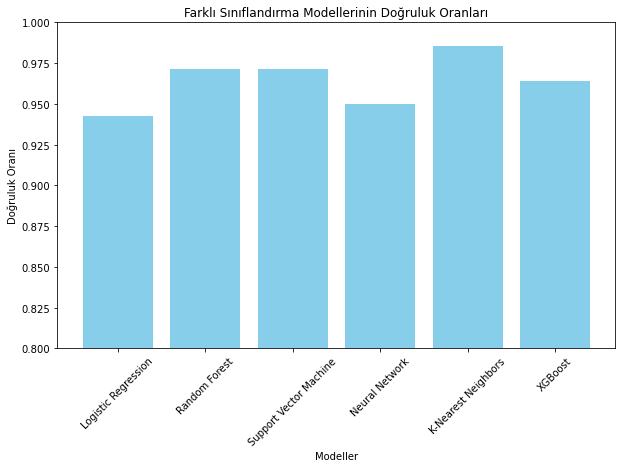

In [53]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Neural Network', 'K-Nearest Neighbors', 'XGBoost']


accuracies = [accuracy_lr, accuracy_rf, accuracy_svm, accuracy_nn, accuracy_knn, accuracy_xgb]  # Burada accuracy_xgb değerini XGBoost modelinizin sonucuyla değiştirmeniz gerekmektedir.

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk Oranı')
plt.title('Farklı Sınıflandırma Modellerinin Doğruluk Oranları')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  
plt.show()
